In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [11]:
def deriv(x, t): # t는 독립변수, x는 종속변수
    # dx/dt = f(x)
    return 3.0*t**2 + 2.0*t + 1.0

#오일러 방법을 이용한 ODE 만들기
def my_ode(x, t, h):
    # x_(i+1) = x_(i) + h*f(x, t)
    x = x + h*deriv(x, t)
    return x

def solution(x, t): # 위의 deriv를 적분해준 함수
    return t**3.0 + t**2.0 + t + 1.0
 
t = 0.0
tf = 2.0
n = 4 #t에서 tf까지 4등분하겠다.
h = (tf-t) / n
print('h:', h)
x = 1.0 # x(t=0) = 1.0
for i in range(n+1):
    true = solution(x, t)
    print('step', i, ':', 't:', t, 'x:', x, 'actual:', true, 'error:', abs(x-true))
    x = my_ode(x, t, h)
    t = t + h


h: 0.5
step 0 : t: 0.0 x: 1.0 actual: 1.0 error: 0.0
step 1 : t: 0.5 x: 1.5 actual: 1.875 error: 0.375
step 2 : t: 1.0 x: 2.875 actual: 4.0 error: 1.125
step 3 : t: 1.5 x: 5.875 actual: 8.125 error: 2.25
step 4 : t: 2.0 x: 11.25 actual: 15.0 error: 3.75


In [12]:
def deriv(x, t): # t는 독립변수, x는 종속변수
    # dx/dt = f(x)
    return 3.0*t**2 + 2.0*t + 1.0

# Mid-point 방법을 이용한 ODE 만들기
def my_ode(x, t, h):
    h_half = h/2.0
    t_half = t + h_half
    x_half = x + h_half*deriv(x, t)
    x = x + h*deriv(x_half, t_half)
    return x

def solution(x, t): # 위의 deriv를 적분해준 함수
    return t**3.0 + t**2.0 + t + 1.0
 
t = 0.0
tf = 2.0
n = 4 #t에서 tf까지 4등분하겠다.
h = (tf-t) / n
print('h:', h)
x = 1.0 # x(t=0) = 1.0
for i in range(n+1):
    true = solution(x, t)
    print('step', i, ':', 't:', t, 'x:', x, 'actual:', true, 'error:', abs(x-true))
    x = my_ode(x, t, h)
    t = t + h


h: 0.5
step 0 : t: 0.0 x: 1.0 actual: 1.0 error: 0.0
step 1 : t: 0.5 x: 1.84375 actual: 1.875 error: 0.03125
step 2 : t: 1.0 x: 3.9375 actual: 4.0 error: 0.0625
step 3 : t: 1.5 x: 8.03125 actual: 8.125 error: 0.09375
step 4 : t: 2.0 x: 14.875 actual: 15.0 error: 0.125


[[ 1.        ]
 [ 1.87500003]
 [ 4.00000003]
 [ 8.12500003]
 [15.00000003]]
step 0 : 0.0 error: [0.]
step 1 : 0.5 error: [3.45832958e-08]
step 2 : 1.0 error: [3.45832962e-08]
step 3 : 1.5 error: [3.45832945e-08]
step 4 : 2.0 error: [3.45832945e-08]


Text(0, 0.5, 'x(t)')

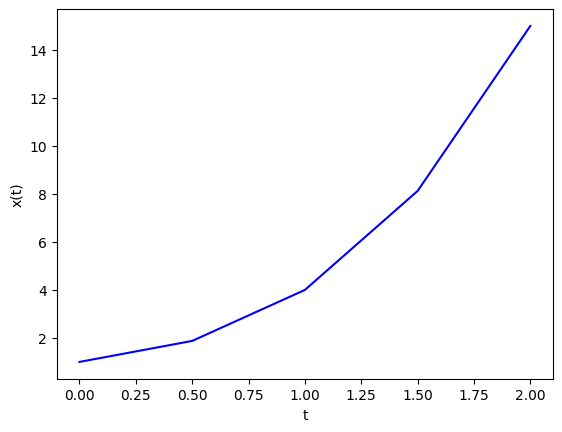

In [13]:
def deriv(x, t): # t는 독립변수, x는 종속변수
    # dx/dt = f(x)
    return 3.0*t**2 + 2.0*t + 1.0


def solution(x, t): # 위의 deriv를 적분해준 함수
    return t**3.0 + t**2.0 + t + 1.0

x = 1.0 # x(t=0) = 1.0
n = 5
t0 = 0.0
tf = 2.0
tarr = np.linspace(t0, tf, n)

true = solution(x, tarr)
result = odeint(deriv, x, tarr)
# odeint(func, y0, t, args=(),...)
# func: 도함수 자체 함수, y0: initial value, t: time squance (array)
print(result)

for i in range(n):
    print('step', i, ':', tarr[i], 'error:', abs(result[i]-true[i]))

plt.plot(tarr, result, c='b')
plt.xlabel('t')
plt.ylabel('x(t)')


In [14]:
def deriv(x, t):
    return 3.0*t**2.0 + 2.0*t + 1.0

def solution(x, t):
    return t**3.0 + t**2.0 + t + 1.0

def my_rk4(x, t, h):
    h_half = h / 2.0
    t_half = t + h_half
    k1 = h*deriv(x, t)
    k2 = h*deriv(x+k1/2.0, t_half)
    k3 = h*deriv(x+k2/2.0, t_half)
    k4 = h*deriv(x+k3, t+h)
    k = 1.0/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)
    x = x + k
    return x
    
t = 0.0
tf = 2.0
n = 4
h = (tf-t)/n
x = 1.0

for i in range(n+1):
    true = solution(x, t)
    print('step', i, 't:', t, 'x:', x, 'error:', abs(x-true))
    x = my_rk4(x, t, h)
    t = t + h

step 0 t: 0.0 x: 1.0 error: 0.0
step 1 t: 0.5 x: 1.875 error: 0.0
step 2 t: 1.0 x: 4.0 error: 0.0
step 3 t: 1.5 x: 8.125 error: 0.0
step 4 t: 2.0 x: 15.0 error: 0.0


Text(0, 0.5, 'y')

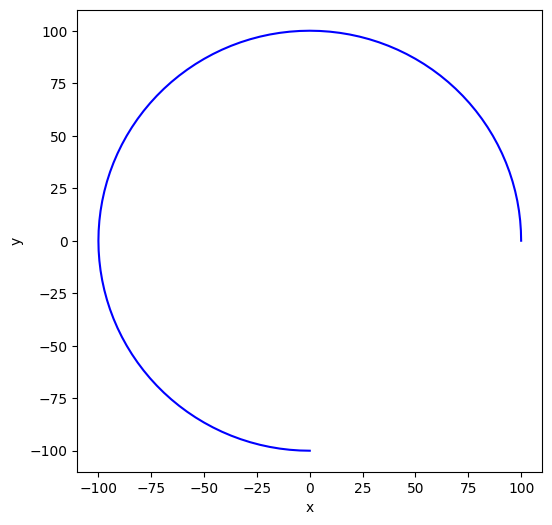

In [15]:
# 궤도 계산을 구현해보겠음.

# y: y[0]=x-position, y[1]=y-position, y[2]=z-position, y[3]=x-velocity, y[4]=y-velocity, y[5]=z-velocity
# y는 array

def deriv(y, t):
    G = 1.0
    M = 1e6
    r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)
    dydx = np.zeros(6, dtype='float')
    dydx[0] = y[3] # solution: x(t) -> 내가 구하고자 하는 것
    #y[3]이 x-velocity이니, 이를 한 번 적분하면 x-position됨.
    dydx[1] = y[4] # solution: y(t)
    dydx[2] = y[5] # solution: z(t)
    dydx[3] = -M/(r**3)*y[0] #solution: vx(t)
    dydx[4] = -M/(r**3)*y[1] #solution: vy(t)
    dydx[5] = 0.0 #평면 상으로 생각할 것이기에 z 성분 0이라 하자. 
    return dydx



y = np.zeros(6)
y[0] = 0.0
y[1] = -100
y[2] = 0.0
dydx = deriv(y, t)
r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)
vc = np.sqrt(dydx[3]**2.0 + dydx[4]**2.0 + dydx[5]**2.0)
y[3] = -vc
y[4] = 0.0
y[5] = 0.0

period = 2*np.pi*r/np.abs(vc)*0.75
n = 100
tarr = np.linspace(0, period, 100)

y = odeint(deriv, y, tarr) # 100,6 6개의 변수가 100번...


plt.figure(figsize=(6,6))
plt.plot(y[:,0], y[:,1], c ='b')
plt.xlabel('x')
plt.ylabel('y')

실습

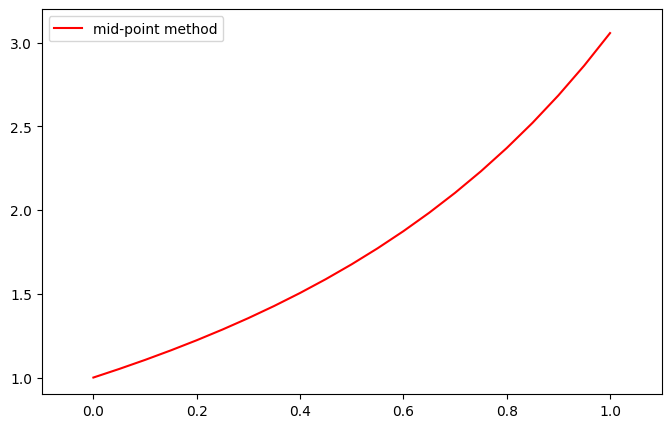

In [16]:
#mid point method

def deriv(x, y):
    return x*y+1

def my_ode(x, y, h):
    h_half = h/2.0
    x_half = x + h_half
    y_half = y + h_half*deriv(x, y)
    y = y + h * deriv(x_half, y_half)
    return y

x0 = 0.0
xf = 1.0
n = 20
h = (xf-x0)/n
y = 1.0

x_list = []
y_list = []

for i in range(n+1):
    x_list.append(x0)
    y_list.append(y)
    y = my_ode(x0, y, h)
    x0 = x0 + h

plt.figure(figsize=(8,5))
plt.plot(x_list, y_list, c='r',label='mid-point method')
plt.xlim(-0.1, 1.1)
plt.ylim(0.9, 3.2)
plt.legend()

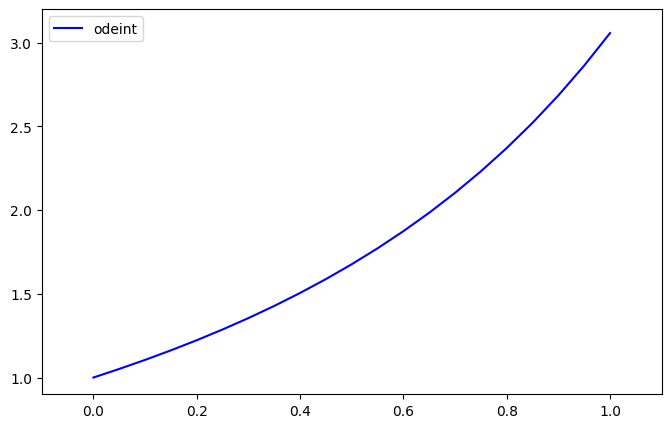

In [17]:
#odient

def deriv(x, y):
    return x*y+1

x = np.linspace(0.0, 1.0, 20)
y = 1.0

result = odeint(deriv, y, x)

plt.figure(figsize=(8,5))
plt.plot(x_list, y_list, c='b',label='odeint')
plt.xlim(-0.1, 1.1)
plt.ylim(0.9, 3.2)
plt.legend()

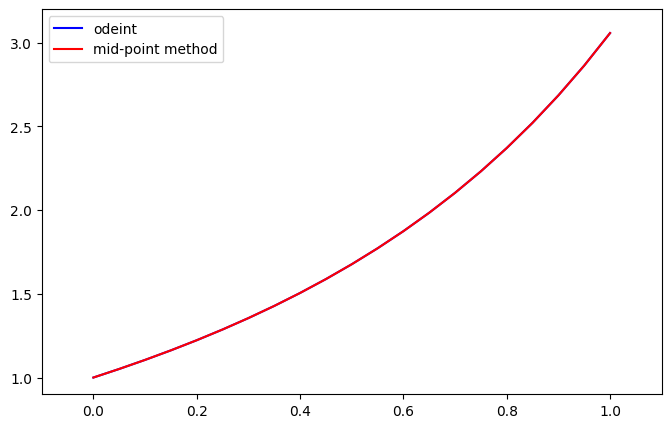

In [18]:
#그림

plt.figure(figsize=(8,5))
plt.plot(x_list, y_list, c='b',label='odeint')
plt.plot(x_list, y_list, c='r',label='mid-point method')
plt.xlim(-0.1, 1.1)
plt.ylim(0.9, 3.2)
plt.legend()

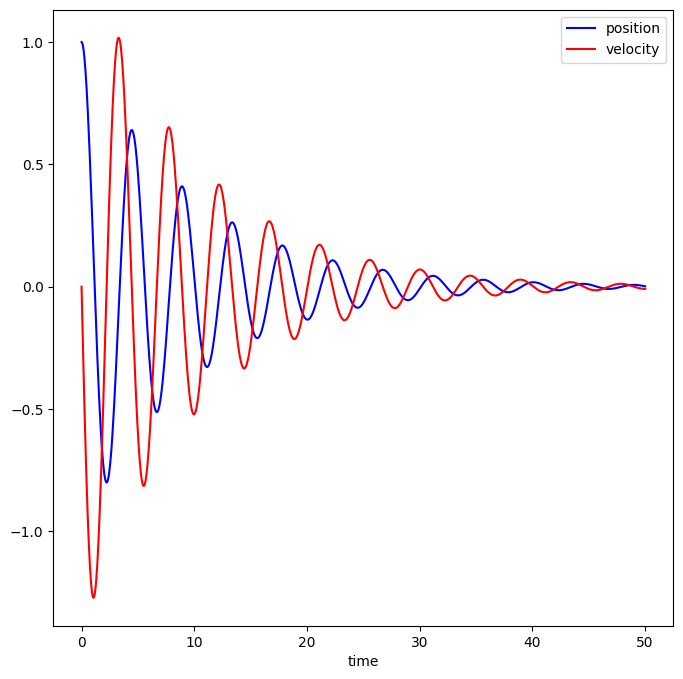

In [19]:
def deriv(x, t):
    k = 100.0
    B = 10.0
    M = 50.0
    dxdt = np.zeros(2, dtype='float')
    Fx = (-1.0*k*x[0]-B*x[1]) #힘
    ax = Fx/M 
    
    dxdt[0] = x[1]
    dxdt[1] = ax
    return dxdt 

x = np.zeros(2) #x[0] = x, x[1] = vx
x[0] = 1.0
x[1] = 0.0
tarr = np.linspace(0, 50, 1000)

x = odeint(deriv, x, tarr)

plt.figure(figsize=(8,8))
plt.plot(tarr, x[:,0], c='b', label='position')
plt.plot(tarr, x[:,1], c='r', label='velocity')
plt.xlabel('time')
plt.legend()

용수철 상수가 100일 때, 주기는 4.442882938158366 이다.
용수철 상수가 10일 때, 주기는 14.049629462081453 이다.


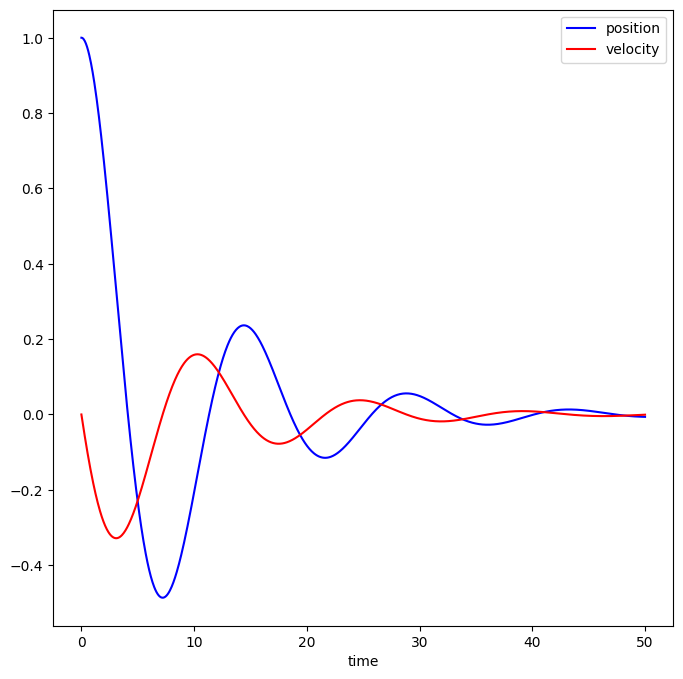

In [20]:
#2.

#k=100.0 일때, 주기 구하기
k = 100.0
M = 50.0
omega = np.sqrt(k/M)
t = 2.0*np.pi/omega
print('용수철 상수가 100일 때, 주기는', t, '이다.')

#k=10.0 일때, 주기 구하기
k = 10.0
M = 50.0
omega = np.sqrt(k/M)
t = 2.0*np.pi/omega
print('용수철 상수가 10일 때, 주기는', t, '이다.')

def deriv(x, t):
    k = 10.0
    B = 10.0
    M = 50.0
    dxdt = np.zeros(2, dtype='float')
    Fx = (-1.0*k*x[0]-B*x[1])
    ax = Fx/M
    dxdt[0] = x[1]
    dxdt[1] = ax
    return dxdt 

x = np.zeros(2) #x[0] = x, x[1] = vx
x[0] = 1.0
x[1] = 0.0
tarr = np.linspace(0, 50, 1000)

x = odeint(deriv, x, tarr)

plt.figure(figsize=(8,8))
plt.plot(tarr, x[:,0], c='b', label='position')
plt.plot(tarr, x[:,1], c='r', label='velocity')
plt.xlabel('time')
plt.legend()